##1. Installing Libraries and extracting Dataset

In [2]:
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI


  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-wweiiqz2
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-wweiiqz2
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp312-cp312-linux_x86_64.whl size=426679 sha256=fae967e7178d48cbc09b5f8611beffc39f56cf8aa281076e72d8411887accd07
  Stored in directory: /tmp/pip-ephem-wheel-cache-oyih095g/wheels/95/e6/c7/8ceda667bca7218619fea052622a0b11a37fb51c28c993fae3
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.10
    Uninstalling pycocotools-2.0.10:
      Successfully uninstalled pycocotools-2.0.10


In [3]:
!pip install pycocotools

In [4]:
!pip install --upgrade scikit-image scipy

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import seaborn as sns
import numpy as np

from random import shuffle
from PIL import Image

from pycocotools.coco import COCO

##2. Extracting Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

# Load COCO annotation file (you can also use the test file)
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip -q annotations_trainval2017.zip -d /content/drive/MyDrive/COCO_dataset/annotations

# Initialize COCO API for instance annotations
annFile = '/content/drive/MyDrive/COCO_dataset/annotations/annotations/instances_train2017.json'
coco = COCO(annFile)

--2025-11-22 20:54:45--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 16.182.109.105, 52.217.113.33, 52.216.60.81, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|16.182.109.105|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  54.6MB/s    in 4.8s    

2025-11-22 20:54:50 (49.8 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

replace /content/drive/MyDrive/COCO_dataset/annotations/annotations/instances_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
y
y
y
replace /content/drive/MyDrive/COCO_dataset/annotations/annotations/instances_val2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace /content/drive/MyDrive/COCO_dataset/annotations/annotations/captions_train2017.json? [y]es, [n]o, [A]ll, [N]one, 

I have added a cell to mount your Google Drive. Please run it and authorize Colab to access your Drive.

Now, I will modify the code in cell `E7SYS1ZFrFoo` to extract the annotations to `/content/drive/MyDrive/COCO_dataset/annotations` and update the `annFile` variable to reflect this path.

Here is the code to load COCO annotations and display the categories.

**Important:** The `annotation_path` variable needs to be set to the actual path of your COCO annotation file.

In [5]:
import pandas as pd

In [6]:
ANNOT_URL = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"
ANNOT_DIR = "./annotations"
ANNOT_FILE = f"{ANNOT_DIR}/annotations/instances_train2017.json"

if not os.path.exists(ANNOT_FILE):
    !wget -q $ANNOT_URL -O annotations.zip
    !unzip -q annotations.zip -d $ANNOT_DIR

# --- Step 4: Initialize COCO API ---
coco = COCO(ANNOT_FILE)

# --- Step 5: Get all categories ---
cat_ids = coco.getCatIds()
cats = coco.loadCats(cat_ids)

# --- Step 6: For each category, count how many images belong to it ---
category_counts = []
for cat in cats:
    img_ids = coco.getImgIds(catIds=[cat['id']])
    category_counts.append({
        'Category': cat['name'],
        'Supercategory': cat['supercategory'],
        'Num_Images': len(img_ids)
    })

# --- Step 7: Display in tabular format ---
df = pd.DataFrame(category_counts).sort_values(by='Num_Images', ascending=False).reset_index(drop=True)

# Set Pandas display options to ensure tabular view
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# --- Step 8: Display nicely ---
from IPython.display import display
display(df.style.set_properties(**{'text-align': 'center'}))

# Optional: quick summary
print(f"\nTotal Categories: {len(df)}")
unique_imgs = len(set(sum([coco.getImgIds(catIds=[c['id']]) for c in cats], [])))
print(f"Total Unique Images (approx, may overlap): {unique_imgs}")

loading annotations into memory...
Done (t=13.65s)
creating index...
index created!


,Category,Supercategory,Num_Images
0,person,person,64115
1,chair,furniture,12774
2,car,vehicle,12251
3,dining table,furniture,11837
4,cup,kitchen,9189
5,bottle,kitchen,8501
6,bowl,kitchen,7111
7,handbag,accessory,6841
8,truck,vehicle,6127
9,bench,outdoor,5570



Total Categories: 80
Total Unique Images (approx, may overlap): 117266


In [6]:
yfrom pycocotools.coco import COCO
import pandas as pd
import requests

# Load captions annotation file
!wget -q http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip -q annotations_trainval2017.zip -d ./annotations

annFile = './annotations/annotations/captions_train2017.json'
coco_caps = COCO(annFile)

# Get image-caption pairs (limit to 2000 for now)
anns = coco_caps.loadAnns(coco_caps.getAnnIds())[:2000]
data = []
for a in anns:
    img = coco_caps.loadImgs(a['image_id'])[0]
    data.append({
        "image_url": img['coco_url'],
        "caption": a['caption']
    })

df = pd.DataFrame(data)
df.head()


replace ./annotations/annotations/instances_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
y
y
y
y
y
y

y
y
y
y
y
y

y
y
y
y

y
y
y
y
y
y

y
y
y
replace ./annotations/annotations/instances_val2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
y

replace ./annotations/annotations/captions_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
y
replace ./annotations/annotations/captions_val2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: replace ./annotations/annotations/person_keypoints_train2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y
y

replace ./annotations/annotations/person_keypoints_val2017.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: loading annotations into memory...
Done (t=1.38s)
creating index...
index created!


,image_url,caption
0,http://images.cocodataset.org/train2017/000000...,A bicycle replica with a clock as the front wh...
1,http://images.cocodataset.org/train2017/000000...,A room with blue walls and a white sink and door.
2,http://images.cocodataset.org/train2017/000000...,A car that seems to be parked illegally behind...
3,http://images.cocodataset.org/train2017/000000...,A large passenger airplane flying through the ...
4,http://images.cocodataset.org/train2017/000000...,There is a GOL plane taking off in a partly cl...


##3. Model Pipeline

In [7]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.8 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-xo86aebj
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-xo86aebj
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=9ab47aa1d9b580d5cf0d9e1f9e3fb8c6e12c8676a00b316d80a99e62b239c93b
  Stored in directory: /tmp/pip-ephem-wheel-cache-ncxi16bw/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


In [8]:
# import torch
# import clip
# from PIL import Image

# device = "cuda" if torch.cuda.is_available() else "cpu"
# model, preprocess = clip.load("ViT-B/32", device=device)

# text_inputs = torch.cat([clip.tokenize(df['caption'].iloc[i]) for i in range(5)]).to(device)
# with torch.no_grad():
#     text_features = model.encode_text(text_inputs)
# print("Embedding shape:", text_features.shape)


In [9]:
import pandas as pd
from pycocotools.coco import COCO

# Ensure annotations directory exists
ANNOT_DIR = './annotations'
if not os.path.exists(ANNOT_DIR):
    os.makedirs(ANNOT_DIR)

# Download and unzip the annotations file if not already present
ANNOT_ZIP = 'annotations_trainval2017.zip'
if not os.path.exists(ANNOT_ZIP):
    !wget -q http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip -o -q annotations_trainval2017.zip -d {ANNOT_DIR} # -o flag to overwrite without prompting

# Define the path to the captions annotation file
captions_ann_file = f'{ANNOT_DIR}/annotations/captions_train2017.json'

# Initialize COCO API for captions
coco_caps = COCO(captions_ann_file)

# Get image-caption pairs (limit to 2000 for now, as in the original code)
anns = coco_caps.loadAnns(coco_caps.getAnnIds())[:2000]

data = []
for a in anns:
    img = coco_caps.loadImgs(a['image_id'])[0]
    data.append({
        "image_url": img['coco_url'],
        "caption": a['caption']
    })

caption_df = pd.DataFrame(data)

print("Caption DataFrame created successfully with columns:", caption_df.columns.tolist())
display(caption_df.head())

loading annotations into memory...
Done (t=2.44s)
creating index...
index created!
Caption DataFrame created successfully with columns: ['image_url', 'caption']


,image_url,caption
0,http://images.cocodataset.org/train2017/000000...,A bicycle replica with a clock as the front wh...
1,http://images.cocodataset.org/train2017/000000...,A room with blue walls and a white sink and door.
2,http://images.cocodataset.org/train2017/000000...,A car that seems to be parked illegally behind...
3,http://images.cocodataset.org/train2017/000000...,A large passenger airplane flying through the ...
4,http://images.cocodataset.org/train2017/000000...,There is a GOL plane taking off in a partly cl...


In [10]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Use caption_df that was created in the previous cell
text_inputs = torch.cat([clip.tokenize(caption_df['caption'].iloc[i]) for i in range(5)]).to(device)
with torch.no_grad():
    text_features = model.encode_text(text_inputs)
print("Embedding shape:", text_features.shape)

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 155MiB/s]


Embedding shape: torch.Size([5, 512])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.0 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!



Prompt → A cozy modern kitchen of size 10x12 ft, decorated with dining table, refrigerator, microwave, plant, realistic lighting, 4K interior render


  0%|          | 0/30 [00:00<?, ?it/s]

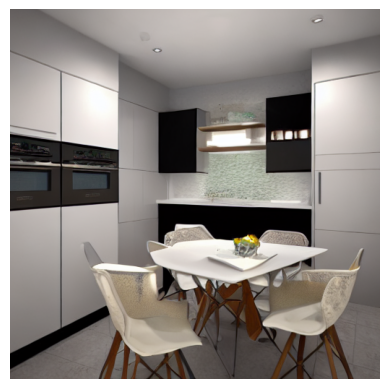

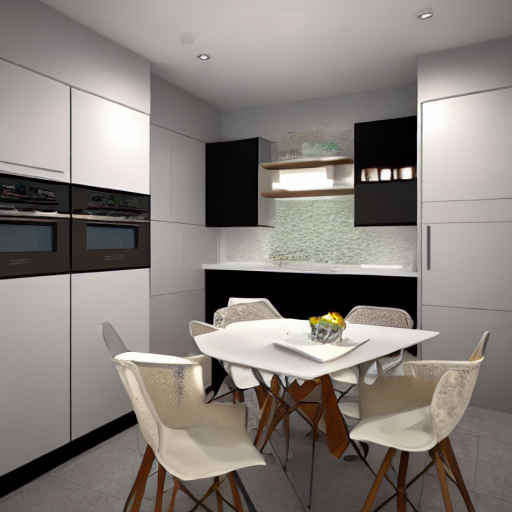

In [11]:
# --- STEP 1: Install Dependencies ---
!pip install -q diffusers==0.31.0 transformers accelerate torch torchvision safetensors

# --- STEP 2: Imports ---
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image
import matplotlib.pyplot as plt

# --- STEP 3: Load Pretrained Stable Diffusion Model ---
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# --- STEP 4: Function to Generate Room Image ---
def generate_room(room_type, size, objects_list, style="modern"):
    prompt = f"A {style} {room_type} of size {size}, decorated with {', '.join(objects_list)}, realistic lighting, 4K interior render"
    print(f"\nPrompt → {prompt}")
    image = pipe(prompt, num_inference_steps=30, guidance_scale=8.5).images[0]
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    return image

# --- STEP 5: Example Run ---
generate_room(
    room_type="kitchen",
    size="10x12 ft",
    objects_list=["dining table", "refrigerator", "microwave", "plant"],
    style="cozy modern"
)


In [12]:
# --- Step 1: Install dependencies (run once per session) ---
!pip install -q diffusers transformers accelerate safetensors torch torchvision

# --- Step 2: Import and load model ---
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")

# --- Step 3: Custom user prompt ---
prompt = input("Enter your prompt (e.g., 'A cozy 12x10 kitchen with fridge and plants'): ")

# --- Step 4: Generate and display ---
image = pipe(prompt, guidance_scale=7.5, num_inference_steps=30).images[0]
image.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Enter your prompt (e.g., 'A cozy 12x10 kitchen with fridge and plants'): kitchen with fridge and plants


  0%|          | 0/30 [00:00<?, ?it/s]

Enter base idea (e.g., 'modern kitchen'):  modern kids bedroom
Final prompt: A  modern kids bedroom with refrigerator, dining table, lamp, 4K photo


  0%|          | 0/30 [00:00<?, ?it/s]

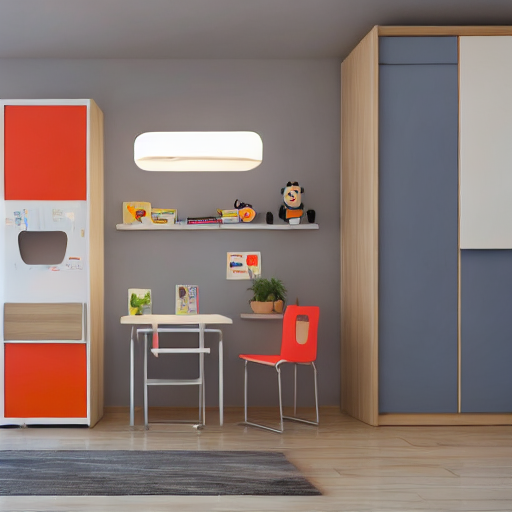

In [13]:
base_prompt = input("Enter base idea (e.g., 'modern kitchen'): ")
categories = ["refrigerator", "dining table", "lamp"]
prompt = f"A {base_prompt} with {', '.join(categories)}, 4K photo"
print("Final prompt:", prompt)

image = pipe(prompt, guidance_scale=7.5, num_inference_steps=30).images[0]
from IPython.display import display
display(image)


In [14]:
import gradio as gr

def generate(prompt):
    image = pipe(prompt, guidance_scale=7.5, num_inference_steps=30).images[0]
    return image

gr.Interface(
    fn=generate,
    inputs=gr.Textbox(label="Describe your room"),
    outputs="image",
    title="Room Decor Generator"
).launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9bbff731b6179a10af.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#2. Milestone 2

##4. Integrate text encoder (CLIP/BERT) with diffusion model (Stable Diffusion / DDPM)

In [15]:
!pip install -q torch torchvision diffusers transformers accelerate safetensors numpy

import torch, numpy as np, os, json
from diffusers import StableDiffusionPipeline

device = "cuda" if torch.cuda.is_available() else "cpu"


1. Loading pipeline with CLIP Encoder

In [16]:
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device=="cuda" else torch.float32,
).to(device)

tokenizer = pipe.tokenizer
text_encoder = pipe.text_encoder
print("Tokenizer & CLIP encoder loaded")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Tokenizer & CLIP encoder loaded


2. Generator or Encoding Function

In [17]:
@torch.no_grad()
def encode_prompts(
    prompts,
    neg_prompts=None,
    device=device,
    max_length=77
):
    if neg_prompts is None:
        neg_prompts = [""] * len(prompts)

    # Tokenize into (batch, seq_len=77)
    text_inputs = tokenizer(
        prompts,
        padding="max_length",
        max_length=max_length,
        truncation=True,
        return_tensors="pt",
    )

    neg_inputs = tokenizer(
        neg_prompts,
        padding="max_length",
        max_length=max_length,
        truncation=True,
        return_tensors="pt",
    )

    # CLIP text encoder → (batch, 77, 768)
    prompt_embeds = text_encoder(text_inputs.input_ids.to(device))[0]
    neg_embeds    = text_encoder(neg_inputs.input_ids.to(device))[0]

    # Match UNet dtype
    dtype = pipe.unet.dtype
    prompt_embeds = prompt_embeds.to(dtype)
    neg_embeds    = neg_embeds.to(dtype)

    return prompt_embeds, neg_embeds

3. generating images using vecotor storage for embeddings

In [18]:
@torch.no_grad()
def generate_images_from_embeds(
    prompt_embeds,
    negative_prompt_embeds,
    guidance_scale=7.5,
    num_inference_steps=30,
    height=512,
    width=512,
    seed=42,
):

    generator = torch.Generator(device=device).manual_seed(seed)

    out = pipe(
        prompt_embeds=prompt_embeds,
        negative_prompt_embeds=negative_prompt_embeds,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=generator,
        height=height,
        width=width,
        output_type="pil",
    )

    return out.images


4. Vector Storage

In [19]:
def save_vector_store(prompts, prompt_embeds,
                      path_npz="data/vectorstore.npz",
                      path_json="data/vectorstore_meta.json"):
    os.makedirs("data", exist_ok=True)
    np.savez_compressed(path_npz, embeddings=prompt_embeds.cpu().numpy())
    with open(path_json, "w") as f:
        json.dump({"prompts": prompts}, f, indent=2)
    print("Vectorstore saved ✔")

def load_vector_store(path_npz="data/vectorstore.npz",
                      path_json="data/vectorstore_meta.json"):
    meta = json.load(open(path_json))
    arr = np.load(path_npz)["embeddings"]
    return meta["prompts"], arr

5. Testing CLIP with diffusion model

In [20]:

prompts = [
    "A simple kitchen with refrigerator and dining table and lamp",
    "A modern living room with a smart TV and white sofa",
    "A bedroom with two lamps and a study desk",
    "A dining space with chandelier and wooden chairs",
    "A minimalist studio apartment with indoor plants"
]

neg = ["blurry, low quality, distorted"] * len(prompts)

# Encode embeddings
prompt_embeds, neg_embeds = encode_prompts(prompts, neg)

# Check shapes (SHOULD BE: (5, 77, 768))
print("Prompt embed shape:", prompt_embeds.shape)
print("Negative embed shape:", neg_embeds.shape)

# Save vectorstore
save_vector_store(prompts, prompt_embeds)

# Generate images
os.makedirs("milestone2_outputs", exist_ok=True)

images = generate_images_from_embeds(prompt_embeds, neg_embeds)

for i, img in enumerate(images):
    img.save(f"milestone2_outputs/sample_{i+1}.png")
    print("Saved image:", f"milestone2_outputs/sample_{i+1}.png")

Prompt embed shape: torch.Size([5, 77, 768])
Negative embed shape: torch.Size([5, 77, 768])
Vectorstore saved ✔


  0%|          | 0/30 [00:00<?, ?it/s]

Saved image: milestone2_outputs/sample_1.png
Saved image: milestone2_outputs/sample_2.png
Saved image: milestone2_outputs/sample_3.png
Saved image: milestone2_outputs/sample_4.png
Saved image: milestone2_outputs/sample_5.png


##5. Run baseline conditional generation

In [21]:
# ============================
# BASELINE CONDITIONAL GENERATION
# (Using pretrained Stable Diffusion)
# ============================

!pip install -q diffusers transformers accelerate torch safetensors

import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import os

device = "cuda" if torch.cuda.is_available() else "cpu"

# Load pretrained Stable Diffusion v1.5
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device=="cuda" else torch.float32,
).to(device)

# Your 5 milestone prompts
prompts = [
    "A simple kitchen with refrigerator and dining table and lamp",
    "A modern living room with a smart TV and white sofa",
    "A bedroom with two lamps and a study desk",
    "A dining space with chandelier and wooden chairs",
    "A minimalist studio apartment with indoor plants"
]

# Make output folder
os.makedirs("baseline_outputs", exist_ok=True)

# Generate baseline images
for i, prompt in enumerate(prompts):
    print(f"Generating image {i+1}...")
    image = pipe(prompt).images[0]
    image_path = f"baseline_outputs/baseline_{i+1}.png"
    image.save(image_path)
    print("Saved:", image_path)

print(" Baseline conditional generation complete!")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating image 1...


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: baseline_outputs/baseline_1.png
Generating image 2...


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: baseline_outputs/baseline_2.png
Generating image 3...


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: baseline_outputs/baseline_3.png
Generating image 4...


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: baseline_outputs/baseline_4.png
Generating image 5...


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: baseline_outputs/baseline_5.png
 Baseline conditional generation complete!


##6. Tune classifier-free guidance + noise schedule

In [22]:
!pip install -q diffusers transformers accelerate torch safetensors

import torch
from diffusers import StableDiffusionPipeline
import os

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device=='cuda' else torch.float32
).to(device)

os.makedirs("cfg_scheduler_outputs", exist_ok=True)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

2. Tuning Classifer free guidance

In [23]:
prompts = [
    "A simple kitchen with refrigerator and dining table and lamp"
]

cfg_values = [3, 5, 7.5, 10, 12]

for cfg in cfg_values:
    print(f"Generating CFG={cfg}...")
    image = pipe(
        prompts[0],
        guidance_scale=cfg,
        num_inference_steps=30
    ).images[0]

    filename = f"cfg_scheduler_outputs/cfg_{cfg}.png"
    image.save(filename)
    print("Saved:", filename)


Generating CFG=3...


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: cfg_scheduler_outputs/cfg_3.png
Generating CFG=5...


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: cfg_scheduler_outputs/cfg_5.png
Generating CFG=7.5...


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: cfg_scheduler_outputs/cfg_7.5.png
Generating CFG=10...


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: cfg_scheduler_outputs/cfg_10.png
Generating CFG=12...


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: cfg_scheduler_outputs/cfg_12.png


3. Tuning Diffusion free noise scheduler

In [24]:
from diffusers import (
    DDIMScheduler,
    EulerAncestralDiscreteScheduler,
    LMSDiscreteScheduler,
    PNDMScheduler
)


In [25]:
schedulers = {
    "PNDM": PNDMScheduler.from_config(pipe.scheduler.config),
    "DDIM": DDIMScheduler.from_config(pipe.scheduler.config),
    "EulerA": EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config),
    "LMS": LMSDiscreteScheduler.from_config(pipe.scheduler.config)
}

for name, sched in schedulers.items():
    print(f"Testing scheduler: {name}")
    pipe.scheduler = sched

    image = pipe(
        prompts[0],
        guidance_scale=7.5,  # keep constant
        num_inference_steps=30
    ).images[0]

    filename = f"cfg_scheduler_outputs/scheduler_{name}.png"
    image.save(filename)
    print("Saved:", filename)


Testing scheduler: PNDM


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: cfg_scheduler_outputs/scheduler_PNDM.png
Testing scheduler: DDIM


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: cfg_scheduler_outputs/scheduler_DDIM.png
Testing scheduler: EulerA


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: cfg_scheduler_outputs/scheduler_EulerA.png
Testing scheduler: LMS


  0%|          | 0/30 [00:00<?, ?it/s]

Saved: cfg_scheduler_outputs/scheduler_LMS.png


#3. Milestone 3

In [26]:
!pip install torch torchvision timm diffusers transformers accelerate pytorch-fid scipy matplotlib pillow


In [33]:
import os
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
from torchvision.models.inception import inception_v3
from torchvision.models import Inception_V3_Weights # Import this
import torch.nn.functional as F
from diffusers import StableDiffusionPipeline
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt
from pytorch_fid import fid_score

1. Loading and preprocessing Images

In [28]:
def load_images_from_folder(folder, size=299):
    images = []
    preprocess = transforms.Compose([
        transforms.Resize((size, size)),
        transforms.ToTensor()
    ])
    for fname in os.listdir(folder):
        path = os.path.join(folder, fname)
        if fname.lower().endswith((".png", ".jpg", ".jpeg")):
            img = Image.open(path).convert("RGB")
            images.append(preprocess(img))
    return torch.stack(images)


In [41]:
import torch
import torch.nn.functional as F
from torchvision.models import inception_v3, Inception_V3_Weights

device = "cuda" if torch.cuda.is_available() else "cpu"

weights = Inception_V3_Weights.IMAGENET1K_V1
inception_model = inception_v3(weights=weights, transform_input=False).eval().to(device)


/usr/local/lib/python3.12/dist-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `__iter__` directly via 'StableDiffusionPipeline' object attribute is deprecated. Please access '__iter__' over 'StableDiffusionPipeline's config object instead, e.g. 'scheduler.config.__iter__'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)
/usr/local/lib/python3.12/dist-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `__iter__` directly via 'LMSDiscreteScheduler' object attribute is deprecated. Please access '__iter__' over 'LMSDiscreteScheduler's config object instead, e.g. 'scheduler.config.__iter__'.
  deprecate("direct config name access", "1.0.0", deprecation_message, standard_warn=False)
/usr/local/lib/python3.12/dist-packages/diffusers/configuration_utils.py:140: FutureWarning: Accessing config attribute `__iter__` directly via 'PNDMScheduler' object attribute is deprecated

2. Inception Score

In [36]:
# def compute_inception_score(images, splits=5):
#     # Use Inception_V3_Weights for best practice
#     model = inception_v3(weights=Inception_V3_Weights.IMAGENET1K_V1, transform_input=False).eval().cuda()
#     images = images.cuda()

#     with torch.no_grad():
#         preds = model(images)[0] # Get the main logits output
#         # Ensure preds is at least 2D before applying softmax (batch_size, num_classes)
#         if preds.dim() == 1:
#             preds = preds.unsqueeze(0) # Add a batch dimension if it was squeezed
#         preds = F.softmax(preds, dim=1)

#     scores = []
#     split_size = images.size(0) // splits

#     # Add a small epsilon for numerical stability
#     epsilon = 1e-10

#     for i in range(splits):
#         part = preds[i * split_size: (i + 1) * split_size]
#         # Handle cases where `part` might be empty (e.g., if images.size(0) < splits)
#         if part.size(0) == 0:
#             continue
#         py = torch.mean(part, dim=0)

#         # Add epsilon to avoid log(0) and resulting NaN values
#         kl = part * (torch.log(part + epsilon) - torch.log(py + epsilon))
#         scores.append(torch.exp(torch.mean(torch.sum(kl, dim=1))))

#     # If no scores were computed (e.g., all parts were empty), return nan
#     if not scores:
#         return float('nan')

#     return torch.mean(torch.tensor(scores)).item()

In [42]:
def compute_inception_score(images, splits=5, model=inception_model):
    images = images.to(device)

    with torch.no_grad():
        out = model(images)          # do NOT index [0] here
        if hasattr(out, "logits"):   # InceptionOutputs case
            preds = out.logits
        else:                        # plain Tensor case
            preds = out

        preds = F.softmax(preds, dim=1)

    scores = []
    n = images.size(0)
    split_size = n // splits if n >= splits else n

    for i in range(splits):
        part = preds[i * split_size: (i + 1) * split_size]
        if part.size(0) == 0:
            continue
        py = torch.mean(part, dim=0)
        kl = part * (torch.log(part + 1e-10) - torch.log(py + 1e-10))
        scores.append(torch.exp(torch.mean(torch.sum(kl, dim=1))))

    return torch.mean(torch.stack(scores)).item()


In [43]:
imgs = load_images_from_folder("baseline_outputs")  # your earlier helper
print(imgs.shape)  # should be (N, 3, 299, 299) or similar

IS = compute_inception_score(imgs, splits=5)
print("Inception Score:", IS)


torch.Size([5, 3, 299, 299])
Inception Score: 1.0


3. FID Score

In [44]:
from pytorch_fid.fid_score import calculate_fid_given_paths

fid = calculate_fid_given_paths(["baseline_outputs", "baseline_outputs"], batch_size=5, device=device, dims=2048)
print("FID:", fid)

100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


FID: -0.00024344417505517413


In [45]:
!pip install -q torch torchvision timm diffusers transformers accelerate pytorch-fid scipy matplotlib pillow

import os
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

from torchvision import transforms
from torchvision.models import inception_v3, Inception_V3_Weights
import torch.nn.functional as F

from diffusers import StableDiffusionPipeline
from diffusers import (
    DDIMScheduler,
    EulerAncestralDiscreteScheduler,
    LMSDiscreteScheduler,
    PNDMScheduler
)

from transformers import CLIPProcessor, CLIPModel

device = "cuda" if torch.cuda.is_available() else "cpu"


In [46]:
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def compute_clip_score(prompt, image_path):
    image = Image.open(image_path).convert("RGB")
    inputs = clip_processor(text=[prompt], images=image, return_tensors="pt", padding=True).to(device)
    with torch.no_grad():
        outputs = clip_model(**inputs)
        score = torch.cosine_similarity(outputs.image_embeds, outputs.text_embeds)
    return float(score.item())


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Building prompt image pairs and compute alignment

In [48]:
prompt_image_pairs = [
    {
        "prompt": "A simple kitchen with refrigerator and dining table and lamp",
        "image_path": "baseline_outputs/baseline_1.png",
        "model": "baseline",
        "variant": "default"
    },
    {
        "prompt": "A simple kitchen with refrigerator and dining table and lamp",
        "image_path": "cfg_scheduler_outputs/cfg_7.5.png",
        "model": "cfg_tuned",
        "variant": "cfg_7.5"
    },
    {
        "prompt": "A simple kitchen with refrigerator and dining table and lamp",
        "image_path": "cfg_scheduler_outputs/scheduler_EulerA.png",
        "model": "scheduler_tuned",
        "variant": "EulerA"
    },
    # add more rows as needed
]

rows = []
for item in prompt_image_pairs:
    s = compute_clip_score(item["prompt"], item["image_path"])
    if s >= 0.30:
        qualitative = "strong"
    elif s >= 0.25:
        qualitative = "medium"
    else:
        qualitative = "weak"
    rows.append({
        "prompt": item["prompt"],
        "image_path": item["image_path"],
        "model": item["model"],
        "variant": item["variant"],
        "clip_score": s,
        "alignment": qualitative,
    })

alignment_df = pd.DataFrame(rows)
alignment_df

,prompt,image_path,model,variant,clip_score,alignment
0,A simple kitchen with refrigerator and dining ...,baseline_outputs/baseline_1.png,baseline,default,0.305785,strong
1,A simple kitchen with refrigerator and dining ...,cfg_scheduler_outputs/cfg_7.5.png,cfg_tuned,cfg_7.5,0.300591,strong
2,A simple kitchen with refrigerator and dining ...,cfg_scheduler_outputs/scheduler_EulerA.png,scheduler_tuned,EulerA,0.312397,strong


Parameter Sensitivity

In [ ]:
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16 if device == "cuda" else torch.float32,
).to(device)

os.makedirs("milestone3_cfg", exist_ok=True)

prompts = [
    "A simple kitchen with refrigerator and dining table and lamp",
    "A modern living room with a smart TV and white sofa",
]

cfg_values = [3, 5, 7.5, 10, 12]

results = []

for cfg in cfg_values:
    cfg_scores = []
    for i, prompt in enumerate(prompts):
        out = pipe(prompt, guidance_scale=cfg, num_inference_steps=30)
        img = out.images[0]
        path = f"milestone3_cfg/cfg_{cfg}_p{i+1}.png"
        img.save(path)
        score = compute_clip_score(prompt, path)
        cfg_scores.append(score)
        results.append({
            "param_type": "guidance_scale",
            "value": cfg,
            "prompt": prompt,
            "image_path": path,
            "clip_score": score,
        })
    print("CFG", cfg, "mean CLIPScore:", float(np.mean(cfg_scores)))

sensitivity_df = pd.DataFrame(results)
sensitivity_df.head()


Raw Prompt vs expicit CLIP embeddings

In [49]:
embedding_results = []

# baseline: raw prompts
os.makedirs("milestone3_embeddings/raw", exist_ok=True)
os.makedirs("milestone3_embeddings/clip_embeds", exist_ok=True)

for i, prompt in enumerate(prompts):
    # raw mode
    raw_img = pipe(prompt, guidance_scale=7.5, num_inference_steps=30).images[0]
    raw_path = f"milestone3_embeddings/raw/raw_p{i+1}.png"
    raw_img.save(raw_path)
    raw_score = compute_clip_score(prompt, raw_path)
    embedding_results.append({
        "param_type": "embedding_mode",
        "value": "raw_prompt",
        "prompt": prompt,
        "image_path": raw_path,
        "clip_score": raw_score,
    })

    # explicit CLIP embeds mode (uses encode_prompts + generate_images_from_embeds)
    prompt_embeds, neg_embeds = encode_prompts([prompt], ["blurry, low quality"])
    clip_img = generate_images_from_embeds(
        prompt_embeds=prompt_embeds,
        negative_prompt_embeds=neg_embeds,
        guidance_scale=7.5,
        num_inference_steps=30,
    )[0]
    clip_path = f"milestone3_embeddings/clip_embeds/clip_p{i+1}.png"
    clip_img.save(clip_path)
    clip_score = compute_clip_score(prompt, clip_path)
    embedding_results.append({
        "param_type": "embedding_mode",
        "value": "clip_embeds",
        "prompt": prompt,
        "image_path": clip_path,
        "clip_score": clip_score,
    })

embedding_df = pd.DataFrame(embedding_results)
embedding_df


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

,param_type,value,prompt,image_path,clip_score
0,embedding_mode,raw_prompt,A simple kitchen with refrigerator and dining ...,milestone3_embeddings/raw/raw_p1.png,0.297095
1,embedding_mode,clip_embeds,A simple kitchen with refrigerator and dining ...,milestone3_embeddings/clip_embeds/clip_p1.png,0.298678


Simple grid Visualization

In [50]:
def show_images_grid(image_paths, titles=None, figsize=(15, 5)):
    n = len(image_paths)
    plt.figure(figsize=figsize)
    for i, path in enumerate(image_paths):
        img = Image.open(path).convert("RGB")
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.axis("off")
        if titles is not None:
            plt.title(titles[i])
    plt.tight_layout()
    plt.show()


Baseline vs best cfg

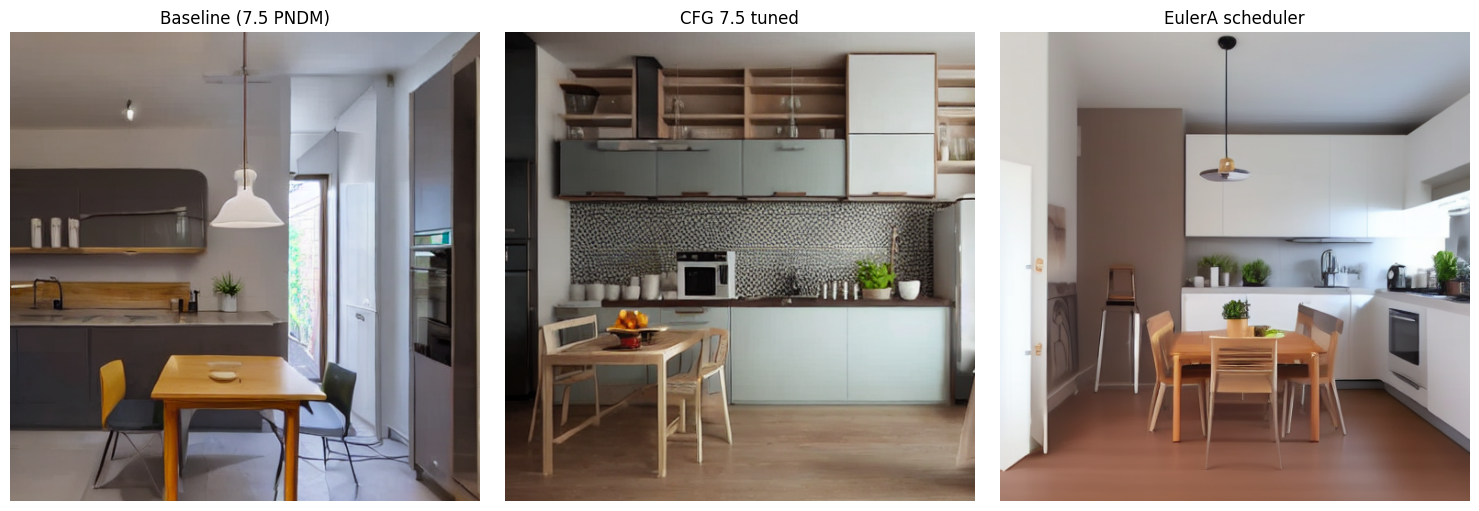

In [52]:
paths = [
    "/content/baseline_outputs/baseline_1.png",
    "/content/cfg_scheduler_outputs/cfg_7.5.png",
    "/content/cfg_scheduler_outputs/scheduler_EulerA.png"
]

titles = ["Baseline (7.5 PNDM)", "CFG 7.5 tuned", "EulerA scheduler"]

show_images_grid(paths, titles)


raw prompt vs CLIP embeddings

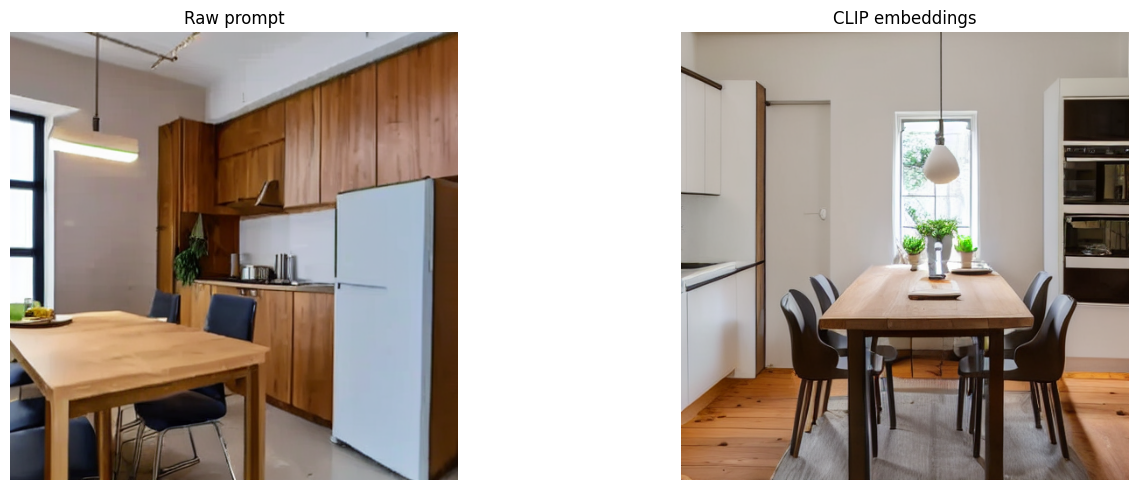

In [53]:
paths = [
    "/content/milestone3_embeddings/raw/raw_p1.png",
    "/content/milestone3_embeddings/clip_embeds/clip_p1.png",
]

titles = ["Raw prompt", "CLIP embeddings"]

show_images_grid(paths, titles)


In [55]:
import os
import numpy as np
import pandas as pd

# prompt set
prompts = [
    "A simple kitchen with refrigerator and dining table and lamp",
    "A modern living room with a smart TV and white sofa",
]

# make output folder
os.makedirs("milestone3_cfg", exist_ok=True)

cfg_values = [3, 5, 7.5, 10, 12]
results = []

for cfg in cfg_values:
    cfg_scores = []
    for i, prompt in enumerate(prompts):
        # generate image
        out = pipe(prompt, guidance_scale=cfg, num_inference_steps=30)
        img = out.images[0]

        # save image
        out_path = f"milestone3_cfg/cfg_{cfg}_p{i+1}.png"
        img.save(out_path)

        # compute CLIP score
        score = compute_clip_score(prompt, out_path)
        cfg_scores.append(score)

        # store row
        results.append({
            "param_type": "guidance_scale",
            "value": cfg,
            "prompt": prompt,
            "image_path": out_path,
            "clip_score": score,
        })

    print(f"CFG={cfg}, Mean CLIPScore={np.mean(cfg_scores)}")

# convert to dataframe
sensitivity_df = pd.DataFrame(results)


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

CFG=3, Mean CLIPScore=0.3169372081756592


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

CFG=5, Mean CLIPScore=0.3005783408880234


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

CFG=7.5, Mean CLIPScore=0.31704555451869965


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

CFG=10, Mean CLIPScore=0.30420275032520294


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

CFG=12, Mean CLIPScore=0.30930234491825104


In [56]:
print(sensitivity_df.head())

       param_type  value                                             prompt                     image_path  clip_score
0  guidance_scale    3.0  A simple kitchen with refrigerator and dining ...    milestone3_cfg/cfg_3_p1.png    0.311218
1  guidance_scale    3.0  A modern living room with a smart TV and white...    milestone3_cfg/cfg_3_p2.png    0.322656
2  guidance_scale    5.0  A simple kitchen with refrigerator and dining ...    milestone3_cfg/cfg_5_p1.png    0.280886
3  guidance_scale    5.0  A modern living room with a smart TV and white...    milestone3_cfg/cfg_5_p2.png    0.320270
4  guidance_scale    7.5  A simple kitchen with refrigerator and dining ...  milestone3_cfg/cfg_7.5_p1.png    0.310980


3. Guidance scale vs CLIP ScorePlot

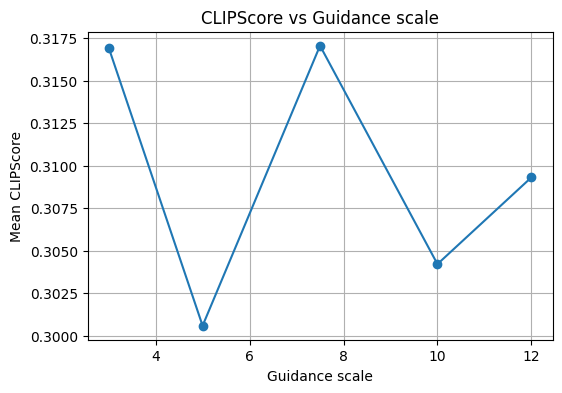

,value,clip_score
0,3.0,0.316937
1,5.0,0.300578
2,7.5,0.317046
3,10.0,0.304203
4,12.0,0.309302


In [57]:
cfg_group = sensitivity_df[sensitivity_df["param_type"] == "guidance_scale"]
cfg_summary = cfg_group.groupby("value")["clip_score"].mean().reset_index()

plt.figure(figsize=(6,4))
plt.plot(cfg_summary["value"], cfg_summary["clip_score"], marker="o")
plt.xlabel("Guidance scale")
plt.ylabel("Mean CLIPScore")
plt.title("CLIPScore vs Guidance scale")
plt.grid(True)
plt.show()

cfg_summary


4. Embedding mode comparison plot

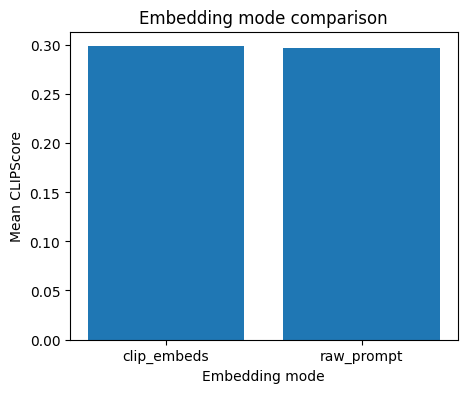

,value,clip_score
0,clip_embeds,0.298678
1,raw_prompt,0.297095


In [58]:
emb_group = embedding_df.groupby("value")["clip_score"].mean().reset_index()

plt.figure(figsize=(5,4))
plt.bar(emb_group["value"], emb_group["clip_score"])
plt.xlabel("Embedding mode")
plt.ylabel("Mean CLIPScore")
plt.title("Embedding mode comparison")
plt.show()

emb_group


5. Summary

In [59]:
all_results_df = pd.concat([alignment_df, sensitivity_df, embedding_df], ignore_index=True)
all_results_df.head()


,prompt,image_path,model,variant,clip_score,alignment,param_type,value
0,A simple kitchen with refrigerator and dining ...,baseline_outputs/baseline_1.png,baseline,default,0.305785,strong,NaN,NaN
1,A simple kitchen with refrigerator and dining ...,cfg_scheduler_outputs/cfg_7.5.png,cfg_tuned,cfg_7.5,0.300591,strong,NaN,NaN
2,A simple kitchen with refrigerator and dining ...,cfg_scheduler_outputs/scheduler_EulerA.png,scheduler_tuned,EulerA,0.312397,strong,NaN,NaN
3,A simple kitchen with refrigerator and dining ...,milestone3_cfg/cfg_3_p1.png,NaN,NaN,0.311218,NaN,guidance_scale,3.0
4,A modern living room with a smart TV and white...,milestone3_cfg/cfg_3_p2.png,NaN,NaN,0.322656,NaN,guidance_scale,3.0


In [60]:
all_results_df.to_csv("milestone3_results.csv", index=False)


#4. Git Repository Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
!mkdir -p /content/drive/MyDrive/generative-ai-room-decorator/{data/raw,notebooks,src,outputs,configs}

In [ ]:
!touch generative-ai-room-decorator/{README.md,.gitignore}

In [ ]:
%cd /content/drive/MyDrive/generative-ai-room-decorator


In [ ]:
%cd /content/drive/MyDrive/generative-ai-room-decorator
!git init
!git remote add origin git@github.com:<username>/generative-ai-room-decorator.git


In [ ]:
!ssh-keygen -t ed25519 -C "pillalamarri.v@northeastern.edu"

# 2️⃣ Start SSH agent and add key
!eval "$(ssh-agent -s)"
!ssh-add ~/.ssh/id_ed25519

# 3️⃣ Show your public key
!cat ~/.ssh/id_ed25519.pub

In [ ]:
!eval "$(ssh-agent -s)"    # start SSH agent
!ssh-add ~/.ssh/id_ed25519 # add your SSH key to the agent


In [ ]:
!ssh -T git@github.com


In [ ]:
# === START: SSH Agent and Key Setup ===

# Start SSH agent and add key in one shell session
!eval "$(ssh-agent -s)"
!ssh-add ~/.ssh/id_ed25519

# Add GitHub to known_hosts (avoids "host key verification failed")
!mkdir -p ~/.ssh
!ssh-keyscan github.com >> ~/.ssh/known_hosts

# Set correct permissions
!chmod 700 ~/.ssh
!chmod 644 ~/.ssh/known_hosts

# Test SSH connection
!ssh -T git@github.com
# === END ===


In [ ]:
!git remote -v


In [ ]:
%cd /content/drive/MyDrive/generative-ai-room-decorator


In [ ]:
!git rebase --abort


In [ ]:
!git status
!git branch


In [ ]:
!git switch -C main


In [ ]:
!git remote remove origin
!git remote add origin git@github.com:PVRPratyusha/generative-ai-room-decorator.git
!git fetch origin


In [ ]:
!git add .
!git commit -m "Clean branch reset after rebase issue"
!git push origin main --force


In [ ]:
!echo ".ipynb_checkpoints/" >> .gitignore
!git add .gitignore
!git commit -m "Ignore Colab checkpoint files"
!git push origin main


In [ ]:
%cd /content/drive/MyDrive/generative-ai-room-decorator/notebooks
!cp Generative_Project_Milestone_1.ipynb Generative_Project_Milestone_1_broken_backup.ipynb


In [ ]:
# from google.colab import files
# uploaded = files.upload()


In [ ]:
!mv "/content/generative_project_milestone_1.py" "/content/drive/MyDrive/generative-ai-room-decorator/notebooks/"


In [ ]:
!ls /content


In [ ]:
!ls "/content/drive/MyDrive/generative-ai-room-decorator/notebooks"


In [ ]:
%cd /content/drive/MyDrive/generative-ai-room-decorator
!git add notebooks/generative_project_milestone_1.py
!git commit -m "Re-upload working Milestone 1 notebook"
!git push origin main


In [ ]:
!touch data/.gitkeep
!touch src/.gitkeep
!touch outputs/.gitkeep
!touch configs/.gitkeep

%cd /content/drive/MyDrive/generative-ai-room-decorator
!git add .
!git commit -m "Add placeholder files to show folder structure"
!git push origin main


In [ ]:
%cd /content/drive/MyDrive/generative-ai-room-decorator


In [ ]:
!git rm notebooks/Generative_Project_Milestone_1\ \(1\).ipynb \
        notebooks/Generative_Project_Milestone_1\ \(2\).ipynb \
        notebooks/Generative_Project_Milestone_1.ipynb \
        notebooks/Generative_Project_Milestone_1_broken_backup.ipynb


In [ ]:
!git commit -m "Remove redundant and corrupted notebook files"
!git push origin main


#Git Push for Milestone 2

In [ ]:
%cd /content/drive/MyDrive/generative-ai-room-decorator


In [ ]:
!git remote -v


In [ ]:
!git config --global user.email "pillalamarri.v@northeastern.edu"
!git config --global user.name "PVRPratyusha"


In [ ]:
!git checkout -b milestone2


In [ ]:
!git remote add origin https://<REMOVED>@github.com/PVRPratyusha/generative-ai-room-decorator.git

In [ ]:
!git remote remove origin


In [ ]:
# ============================
# 0️⃣  GO TO YOUR PROJECT FOLDER
# ============================
%cd /content/drive/MyDrive/generative-ai-room-decorator

# ============================
# 1️⃣  RE-INITIALIZE GIT SAFELY
# ============================
!rm -rf .git
!git init

# Set your identity
!git config --global user.email "pillalamarri.v@northeastern.edu"
!git config --global user.name "PVRPratyusha"

# ============================
# 2️⃣  ADD REMOTE (HTTPS + TOKEN)
# ============================
# 🔴 Replace YOUR_GITHUB_TOKEN_HERE
git remote add origin <REMOVED FOR SECURITY>


# Confirm remote
!git remote -v

# ============================
# 3️⃣  CREATE NEW BRANCH ONLY FOR MILESTONE 2
# ============================
!git checkout -b milestone2-colab

# ============================
# 4️⃣  ADD SEPARATE README FOR THIS BRANCH
# ============================
!echo "# Milestone 2 Work (Colab Branch)" > README_milestone2.md

# ============================
# 5️⃣  ADD ALL PROJECT FILES
# ============================
!git add .
!git commit -m "Milestone 2: Add full project structure + separate README for branch"

# ============================
# 6️⃣  PUSH ONLY THIS BRANCH
# ============================
!git push -u origin milestone2-colab


In [ ]:
!ls /content


In [ ]:
!pwd

In [ ]:
!find /content -name "*Milestone_2*.ipynb"


In [ ]:
!find /content/drive -name "*Milestone_2*.ipynb"


In [ ]:
!find / -name "*Milestone_2*.ipynb" 2>/dev/null


In [ ]:
!mv "/content/drive/MyDrive/Colab Notebooks/Generative_Project_Milestone_2.ipynb" "/content/drive/MyDrive/generative-ai-room-decorator/notebooks/"


In [ ]:
!ls "/content/drive/MyDrive/generative-ai-room-decorator/notebooks/"


In [ ]:
%cd /content/drive/MyDrive/generative-ai-room-decorator
!git reset --soft HEAD~1


In [ ]:
!git add notebooks/Generative_Project_Milestone_2.ipynb


In [ ]:
!git commit -m "Add Milestone 2 notebook (token removed)"


In [ ]:
!git push origin milestone2-colab


In [ ]:
%cd /content/drive/MyDrive/generative-ai-room-decorator
!git checkout milestone2-colab
!git reset --hard main


In [ ]:
!git checkout milestone2-colab
!git rm -r --cached .
!git clean -fd


In [ ]:
!git config --global user.email "pillalamarri.v@northeastern.edu"
!git config --global user.name "PVRPratyusha"


In [ ]:
!git config --global --list


In [ ]:
%cd /content/drive/MyDrive/generative-ai-room-decorator
!git add .
!git commit -m "Rebuilt Milestone 2 branch with clean history (no secrets)"


In [ ]:
!git push origin --delete milestone2-colab


In [ ]:
%cd /content/drive/MyDrive/generative-ai-room-decorator
!git push origin milestone2-colab --force


In [ ]:
%cd /content/drive/MyDrive/generative-ai-room-decorator
!ls -R


In [ ]:
!find "/content/drive/MyDrive" -maxdepth 4 -type d -name "generative-ai-room-decorator*"


In [ ]:
!find "/content/drive/MyDrive" -name "generative_project_milestone_1.py"


In [ ]:
!find "/content/drive/MyDrive" -name "Generative_Project_Milestone_2.ipynb"


In [ ]:
!find "/content/drive/MyDrive" -name ".gitkeep"


In [ ]:
!find "/content/drive/MyDrive" -maxdepth 4 -type d -name "configs"
!find "/content/drive/MyDrive" -maxdepth 4 -type d -name "notebooks"
!find "/content/drive/MyDrive" -maxdepth 4 -type d -name "src"
!find "/content/drive/MyDrive" -maxdepth 4 -type d -name "data"
!find "/content/drive/MyDrive" -maxdepth 4 -type d -name "outputs"


In [ ]:
!find "/content/drive/MyDrive" -maxdepth 5 -type f -name "*.py"
!find "/content/drive/MyDrive" -maxdepth 5 -type f -name "*.ipynb"
!find "/content/drive/MyDrive" -maxdepth 5 -type f -name "Generative*Milestone*"
!find "/content/drive/MyDrive" -maxdepth 5 -type f -name "*.gitkeep"


In [ ]:
!find "/content/drive/MyDrive" -maxdepth 5 -type f -name "*Milestone_2*.ipynb"


In [ ]:
!find "/content/drive/MyDrive" -maxdepth 5 -type d -name "configs"
!find "/content/drive/MyDrive" -maxdepth 5 -type d -name "src"
!find "/content/drive/MyDrive" -maxdepth 5 -type d -name "notebooks"
!find "/content/drive/MyDrive" -maxdepth 5 -type d -name "data"
!find "/content/drive/MyDrive" -maxdepth 5 -type d -name "outputs"


In [ ]:
!find "/content/drive/MyDrive" -maxdepth 5 -type f -name "Generative_Project_Milestone2.ipynb"


#Git Setup for Milestone 3

In [69]:
!git config --global user.email "pillalamarri.v@northeastern.edu"
!git config --global user.name "PVRPratyusha"


In [80]:
%cd /content/drive/MyDrive/Colab_Projects/Room-Decor-AI/generative-ai-room-decorator/notebooks

/content/drive/MyDrive/Colab_Projects/Room-Decor-AI/generative-ai-room-decorator/notebooks


In [81]:
%ls /content/drive/MyDrive/Colab_Projects/Room-Decor-AI/notebooks


In [78]:
!find /content/drive -maxdepth 6 -name "*.ipynb"


/content/drive/MyDrive/Colab Notebooks/Copy of Lab1_Features.ipynb
/content/drive/MyDrive/Colab Notebooks/Copy of Module1_Lab1_0473.ipynb
/content/drive/MyDrive/Colab Notebooks/Module1_Lab1_fmml20210473.ipynb
/content/drive/MyDrive/Colab Notebooks/Mod2_Lab1_fmml20210468.ipynb
/content/drive/MyDrive/Colab Notebooks/Copy of FMML_CLF1_Lab1.ipynb
/content/drive/MyDrive/Colab Notebooks/Copy of FMML_CLF1_Lab2.ipynb
/content/drive/MyDrive/Colab Notebooks/Copy of Project_FMML_CLF1.ipynb
/content/drive/MyDrive/Colab Notebooks/Copy of Build_a_food_image_classifier.ipynb
/content/drive/MyDrive/Colab Notebooks/Heart Attack -updated.ipynb
/content/drive/MyDrive/Colab Notebooks/Heart_Attack_analysis.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled2.ipynb
/content/drive/MyDrive/Colab Notebooks/Untitled3.ipynb
/content/drive/MyDrive/Colab Notebooks/Copy of NewsSentiment.ipynb
/content/drive/MyDrive/Colab Notebooks/NewsSentiment.ipynb
/content/drive/MyDrive/Colab Notebooks/FMML20210473_Mod4_Lab2 (

In [72]:
mv Generative_Project_Milestone2.ipynb Generative_Project_Milestone3.ipynb


mv: cannot stat 'Generative_Project_Milestone2.ipynb': No such file or directory


In [64]:
!sed -i 's/<REMOVED>[A-Za-z0-9_]*/<REMOVED>/g' *.ipynb
!sed -i 's/<REMOVED>[A-Za-z0-9_]*/<REMOVED>/g' *.ipynb
!sed -i 's/:[A-Za-z0-9_-]\{20,\}/:<REMOVED>/g' *.ipynb


In [65]:
cd /content/drive/MyDrive/Colab_Projects/Room-Decor-AI/generative-ai-room-decorator


/content/drive/MyDrive/Colab_Projects/Room-Decor-AI/generative-ai-room-decorator


In [67]:
!git add notebooks/Generative_Project_Milestone3.ipynb
!git commit -m "Rename and update Milestone notebook to Milestone 3"
!git push origin main


fatal: pathspec 'notebooks/Generative_Project_Milestone3.ipynb' did not match any files
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@0db9d1f707db.(none)')
To https://github.com/PVRPratyusha/generative-ai-room-decorator.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/PVRPratyusha/generative-ai-room-decorator.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
